# Day 15 Discussions

## Introduction to NumPy

In [1]:
import numpy as np

In [2]:
# create our first array

array1 = np.array([1,2,3,4,5])

In [3]:
type(array1)

numpy.ndarray

In [4]:
array1

array([1, 2, 3, 4, 5])

In [5]:
# conditionals
# get all even numbers

array1[array1 % 2 == 0]

array([2, 4])

In [6]:
# create array from list
mylist = [1,2,3,4,5]
array1 = np.array(mylist)

In [7]:
array1

array([1, 2, 3, 4, 5])

In [8]:
# multidimensional array
mdarray = np.array([[1,2,3,4,5],[6,7,8,9,10]])

In [9]:
mdarray

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [10]:
# indexing
print(mdarray[1,1])
print(mdarray[0,0])

7
1


In [11]:
# reshape
mdarray_reshaped = mdarray.reshape(1,10)

In [12]:
mdarray

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [13]:
mdarray_reshaped

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [14]:
mdarray_reshaped = mdarray_reshaped.reshape(10,1)

In [15]:
mdarray_reshaped

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [16]:
mdarray_reshaped[0,0]

1

#### NPV Revisited

In [17]:
net_cash_flows = [-2000,100,100,(100+2500)]
periods = [0,1,2,3]
pv_list = [net_cash_flows, periods]

In [18]:
pv_list

[[-2000, 100, 100, 2600], [0, 1, 2, 3]]

In [19]:
r = 0.10
sum([pv[0]/((1+r)**pv[1]) for pv in zip(*pv_list)])

126.97220135236626

In [20]:
# better way with np
net_cash_flows = np.array([-2000,100,100,(100+2500)])
periods = np.array([0,1,2,3])

In [21]:
sum(net_cash_flows/((1+r)**periods))

126.97220135236626

In [22]:
pv_array = np.array([net_cash_flows,periods])

In [23]:
pv_array

array([[-2000,   100,   100,  2600],
       [    0,     1,     2,     3]])

In [24]:
sum(pv_array[0]/((1+r)**pv_array[1]))

126.97220135236626

In [25]:
type(pv_array)

numpy.ndarray

In [26]:
### Software Services Industry

roles       = np.array(["Programmer","Project Manager","Business Analyst","QA Analyst","UX Designer"])
daily_rates = np.array([8500,14000,10000,8500,8500])
man_days    = np.array([20,20,10,10,10])

In [27]:
project_cost = daily_rates * man_days
project_cost

array([170000, 280000, 100000,  85000,  85000])

In [28]:
project_cost.sum()

720000

In [29]:
roles[1]

'Project Manager'

In [30]:
print(roles[1]+": "+str(project_cost[1]))

Project Manager: 280000


In [31]:
### numpy.select
### numpy.select(condlist, choicelist, default=0)[source]
### Return an array drawn from elements in choicelist, depending on conditions.

x = np.arange(10)

np.select([x%2==0, x%3==0], [x**2, x//3])

array([ 0,  0,  4,  1, 16,  0, 36,  0, 64,  3])

#### Example: Sales Forecasts

In [32]:
opportunities = ["TNVS System Rearchitecture","OTT-ABC Corporation"]
amounts = [600000,1500000]

In [33]:
opportunities = np.array(opportunities)
amounts = np.array(amounts)

In [34]:
opportunities

array(['TNVS System Rearchitecture', 'OTT-ABC Corporation'], dtype='<U26')

In [35]:
amounts

array([ 600000, 1500000])

In [36]:
list(amounts[amounts > 1000000])

[1500000]

### Introduction to Pandas

Source: [DataCamp](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)

Pandas is a popular Python package for data science, and with good reason: it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy, among many other things. The DataFrame is one of these structures.

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("class_list.csv")

In [39]:
print(df)

  First_Name  Last_Name
0      Jason  Francisco
1       Carl    Jacinto
2        Joe     Ilagan
3      David  Malabanan
4        Joe     Ilagan


In [40]:
print(df["First_Name"])

0    Jason
1     Carl
2      Joe
3    David
4      Joe
Name: First_Name, dtype: object


In [41]:
print(df["Last_Name"])

0    Francisco
1      Jacinto
2       Ilagan
3    Malabanan
4       Ilagan
Name: Last_Name, dtype: object


To gather more information regarding the data, we can view the column names and data types of each column with the following functions:

In [42]:
df.columns

Index(['First_Name', 'Last_Name'], dtype='object')

In [43]:
import re

re.match(r'I.+',"Ilagan").string

'Ilagan'

In [44]:
df[df["Last_Name"].str.contains("[F-J]")]["Last_Name"]

0    Francisco
1      Jacinto
2       Ilagan
4       Ilagan
Name: Last_Name, dtype: object

In [45]:
df["New_Last_Name"] = df["Last_Name"].str.replace("[F-J]","X")

In [46]:
df["New_Last_Name"]

0    Xrancisco
1      Xacinto
2       Xlagan
3    Malabanan
4       Xlagan
Name: New_Last_Name, dtype: object

In [47]:
df

,First_Name,Last_Name,New_Last_Name
0,Jason,Francisco,Xrancisco
1,Carl,Jacinto,Xacinto
2,Joe,Ilagan,Xlagan
3,David,Malabanan,Malabanan
4,Joe,Ilagan,Xlagan


In [48]:
df = df.drop(columns=['New_Last_Name'])

In [49]:
df

,First_Name,Last_Name
0,Jason,Francisco
1,Carl,Jacinto
2,Joe,Ilagan
3,David,Malabanan
4,Joe,Ilagan


### Creating Dataframes from Dictionaries and Lists



In [50]:
import pandas as pd

In [51]:
df2 = pd.DataFrame([{"name":"a","address":"x"},{"name":"b","address":"y"},{"name":"c","address":"z"}])

In [52]:
df2

,address,name
0,x,a
1,y,b
2,z,c


In [53]:
# rearrange columns
df2 = df2.loc[:,["name","address"]]

df2

,name,address
0,a,x
1,b,y
2,c,z


Lets say we would like to splice our data frame and select only specific portions of our data.  There are three different ways of doing so.

1. .loc()
2. .iloc()
3. .ix()

We will cover the .loc() and .iloc() splicing functions.


In [54]:
import numpy as np
import pandas as pd

days_in_month=20

roles = np.array(["Project Manager","Developer","UX Designer","QA Tester"])

daily_rates = np.array([14000,8500,8500,8000])

involvement = np.array([.5,1.00,1.00,.5])
involvement = involvement * 3 * days_in_month # multiply by 3 for 3 months and days_in_month (which is 20)

data = np.array([roles,daily_rates,involvement]).transpose()

df3 = pd.DataFrame(data,columns=["role","daily_rates","involvement"])
df3["daily_rates"] = df3.daily_rates.astype(float)
df3["involvement"] = df3.involvement.astype(float)


df3

,role,daily_rates,involvement
0,Project Manager,14000.0,30.0
1,Developer,8500.0,60.0
2,UX Designer,8500.0,60.0
3,QA Tester,8000.0,30.0


In [55]:
df3["subtotal"] = df3["daily_rates"] * df3["involvement"]
df3

,role,daily_rates,involvement,subtotal
0,Project Manager,14000.0,30.0,420000.0
1,Developer,8500.0,60.0,510000.0
2,UX Designer,8500.0,60.0,510000.0
3,QA Tester,8000.0,30.0,240000.0


### .loc()
.loc() takes two single/list/range operator separated by ','. The first one indicates the row and the second one indicates columns.

In [56]:
df3.loc[:,["role","subtotal"]]

,role,subtotal
0,Project Manager,420000.0
1,Developer,510000.0
2,UX Designer,510000.0
3,QA Tester,240000.0


The .loc() function requires to arguments, the indices of the rows and the column names you wish to observe.

### .iloc()
.iloc() is integer based slicing, whereas .loc() used labels/column names. Here are some examples:

In [57]:
df3.iloc[:4]

,role,daily_rates,involvement,subtotal
0,Project Manager,14000.0,30.0,420000.0
1,Developer,8500.0,60.0,510000.0
2,UX Designer,8500.0,60.0,510000.0
3,QA Tester,8000.0,30.0,240000.0


In [58]:
df3.iloc[1:5, 2:4]

,involvement,subtotal
1,60.0,510000.0
2,60.0,510000.0
3,30.0,240000.0


In [59]:
project_cost = df3["subtotal"].sum()
"{:>15,}".format(project_cost)

'    1,680,000.0'

In [60]:
df3.dtypes

role            object
daily_rates    float64
involvement    float64
subtotal       float64
dtype: object

In [61]:
# unique values
df3.role.unique()

array(['Project Manager', 'Developer', 'UX Designer', 'QA Tester'],
      dtype=object)

In [62]:
df3.role

0    Project Manager
1          Developer
2        UX Designer
3          QA Tester
Name: role, dtype: object

### Datasets available for use in this class

### Preview of Data Visualization

In [63]:
import matplotlib.pyplot as plt


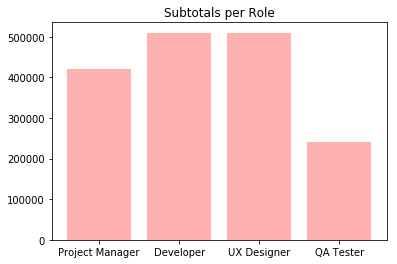

In [64]:
plt.bar(df3["role"],df3["subtotal"],color="#FFB0B0")
plt.title('Subtotals per Role')
plt.show()

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

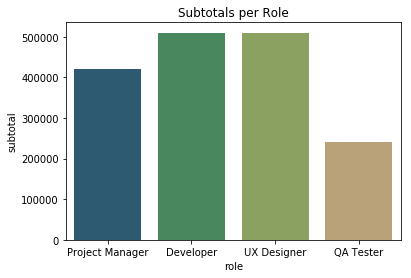

In [66]:
sns.barplot(x=df3["role"], y=df3["subtotal"], palette="gist_earth")
plt.title("Subtotals per Role")
plt.show()

### More Complex Examples follow

In [67]:
import geopandas as gpd
import re

In [68]:
phils=gpd.read_file('gadm36_PHL_shp/gadm36_PHL_3.shp')

In [69]:
phils.loc[phils["NAME_1"]=="Metropolitan Manila",:]

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
24354,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.1_1,Barangay 1,None,None,Barangay,Village,None,None,"POLYGON ((120.9692764282227 14.66245174407959,..."
24355,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.2_1,Barangay 10,None,None,Barangay,Village,None,None,"POLYGON ((120.9679107666017 14.65518093109125,..."
24356,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.3_1,Barangay 100,None,None,Barangay,Village,None,None,"POLYGON ((120.9918060302734 14.6526517868042, ..."
24357,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.4_1,Barangay 101,None,None,Barangay,Village,None,None,"POLYGON ((120.9930725097657 14.65218067169195,..."
24358,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.5_1,Barangay 102,None,None,Barangay,Village,None,None,"POLYGON ((120.9922790527345 14.6497106552124, ..."
24359,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.6_1,Barangay 103,None,None,Barangay,Village,None,None,"POLYGON ((120.9858474731446 14.64703178405767,..."
24360,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.7_1,Barangay 104,None,None,Barangay,Village,None,None,"POLYGON ((120.9843902587891 14.64707088470465,..."
24361,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.8_1,Barangay 105,None,None,Barangay,Village,None,None,"POLYGON ((120.9903488159182 14.64678096771235,..."
24362,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.9_1,Barangay 106,None,None,Barangay,Village,None,None,"POLYGON ((120.9815216064453 14.65146064758301,..."
24363,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,PHL.47.1.10_1,Barangay 107,None,None,Barangay,Village,None,None,"POLYGON ((120.9829559326173 14.65144062042242,..."


In [70]:
metromanila=phils.loc[phils["NAME_1"]=="Metropolitan Manila"]

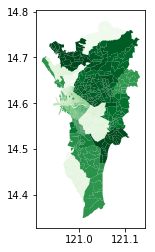

In [71]:
metromanila.plot(cmap = 'Greens')

In [72]:
import descartes
from shapely.geometry import Point, Polygon

In [73]:
locations = {
    "admu":{
        "name":"Ateneo de Manila University",
        "latitude":14.6394557,
        "longitude":121.0758975        
    },
    "upd":{
        "name":"University of the Philippines-Diliman Campus",
        "latitude":14.6538519,
        "longitude":121.0663348
    },
    "dlsu":{
        "name":"De La Salle University-Taft",
        "latitude":14.5647346,
        "longitude":120.9909876

    }, # <-- Note that Python does not complain about this extra comma. This is perfectly okay.
       #     The creators of Python saw that dictionaries tend to be changed a lot, so allowing this is a
       #     convenience for developers who need to add elements when needed.
}

In [74]:
locdf = [loc for loc in locations.values()]
locdf

[{'name': 'Ateneo de Manila University',
  'latitude': 14.6394557,
  'longitude': 121.0758975},
 {'name': 'University of the Philippines-Diliman Campus',
  'latitude': 14.6538519,
  'longitude': 121.0663348},
 {'name': 'De La Salle University-Taft',
  'latitude': 14.5647346,
  'longitude': 120.9909876}]

In [75]:
crs = {'init':'epsg4326'}

In [76]:
geometry=[Point(c) for c in [(x["longitude"],x["latitude"]) for x in locations.values()]]
geometry

In [77]:
geo_df = gpd.GeoDataFrame(locdf,crs=crs,geometry=geometry)

[Text(3, 3, 'Ateneo de Manila University'),
 Text(3, 3, 'University of the Philippines-Diliman Campus'),
 Text(3, 3, 'De La Salle University-Taft')]

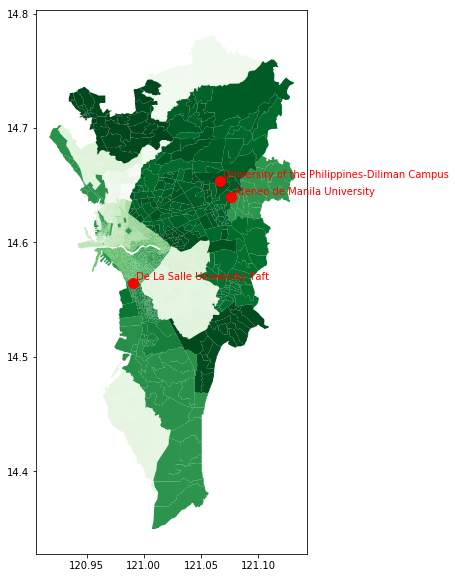

In [78]:
fix, ax = plt.subplots(figsize=(10,10))
metromanila.plot(ax=ax, cmap = 'Greens')
geo_df.plot(ax=ax, color="red",markersize=100)
[ax.annotate(loc["name"], xy=(loc["longitude"],loc["latitude"]),xytext=(3,3), textcoords="offset points", color="red") for loc in locdf]


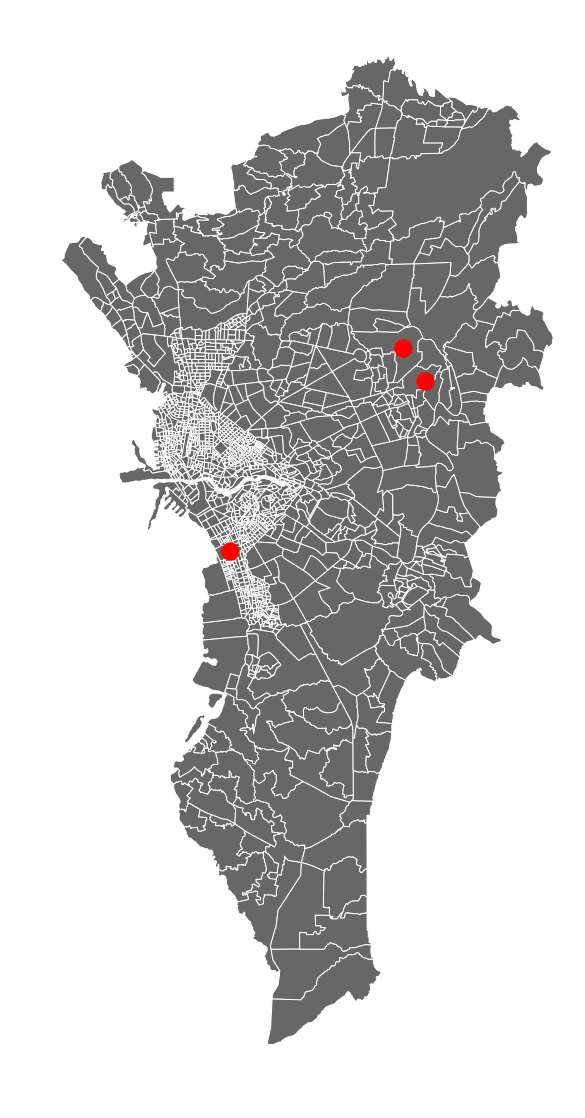

In [79]:
# Remove Borders:
# ax.axis('off')


fix, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
metromanila.plot(ax=ax, color = '#676767',linewidth=1,alpha=1.0,edgecolor='white')
geo_df.plot(ax=ax, color="red",markersize=300)


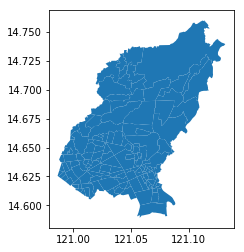

In [80]:
metromanila.loc[(metromanila["NAME_2"])=="Quezon City"]["geometry"].plot()

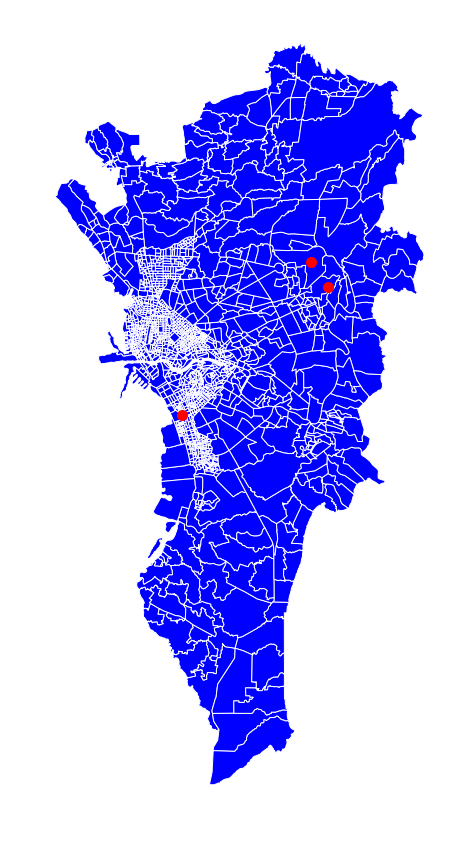

In [81]:
fix, ax = plt.subplots(figsize=(15,15))
ax.axis('off')
metromanila.plot(ax=ax, color = 'blue',linewidth=1,alpha=1.0,edgecolor='white')
geo_df.plot(ax=ax, color="red",markersize=100)

### More Serious Pandas Example

You may download the Philippine Population Datasets [here](http://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__1A__PO/1001A6DTPG0.px/?rxid=52a8e2b8-0da0-4412-8175-f0729cabea2c)

In [82]:
import pandas as pd

In [83]:
# This will produce errors
population_df = pd.read_csv("1A6DTPG0.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 18: invalid continuation byte

In [84]:
# More errors
population_df = pd.read_csv("1A6DTPG0.csv",skiprows=2)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 18: invalid continuation byte

In [106]:
population_df = pd.read_csv("1A6DTPG0.csv",skiprows=2, encoding="ISO-8859-1")

In [107]:
population_df.head()

,Geographic Location,2000,2010,2015
0,PHILIPPINES,76506928,92337852,100981437
1,..National Capital Region (NCR),9932560,11855975,12877253
2,....City of Manila,1581082,1652171,1780148
3,....City of Mandaluyong,278474,328699,386276
4,....City of Marikina,391170,424150,450741


In [108]:
population_df.count()

Geographic Location    136
2000                   136
2010                   136
2015                   136
dtype: int64

In [109]:
len(population_df)

136

In [110]:
population_df.loc[:20,"Geographic Location"]

0                                  PHILIPPINES
1              ..National Capital Region (NCR)
2                           ....City of Manila
3                      ....City of Mandaluyong
4                         ....City of Marikina
5                            ....City of Pasig
6                              ....Quezon City
7                         ....City of San Juan
8                            ....Caloocan City
9                          ....City of Malabon
10                         ....City of Navotas
11                      ....City of Valenzuela
12                       ....City of Las Piñas
13                          ....City of Makati
14                      ....City of Muntinlupa
15                       ....City of Parañaque
16                              ....Pasay City
17                                 ....Pateros
18                             ....Taguig City
19    ..Cordillera Administrative Region (CAR)
20                                    ....Abra
Name: Geograp

In [111]:
# check columns
population_df.columns

Index(['Geographic Location', '2000', '2010', '2015'], dtype='object')

In [112]:
del mm_df
mm_df = population_df.loc[2:18,:] # note: inclusive of the last number

In [113]:
mm_df

,Geographic Location,2000,2010,2015
2,....City of Manila,1581082,1652171,1780148
3,....City of Mandaluyong,278474,328699,386276
4,....City of Marikina,391170,424150,450741
5,....City of Pasig,505058,669773,755300
6,....Quezon City,2173831,2761720,2936116
7,....City of San Juan,117680,121430,122180
8,....Caloocan City,1177604,1489040,1583978
9,....City of Malabon,338855,353337,365525
10,....City of Navotas,230403,249131,249463
11,....City of Valenzuela,485433,575356,620422


#### Do lightweight cleaning


Remove trailing dots

In [114]:
mm_df.loc[:,"Geographic Location"]

2          ....City of Manila
3     ....City of Mandaluyong
4        ....City of Marikina
5           ....City of Pasig
6             ....Quezon City
7        ....City of San Juan
8           ....Caloocan City
9         ....City of Malabon
10        ....City of Navotas
11     ....City of Valenzuela
12      ....City of Las Piñas
13         ....City of Makati
14     ....City of Muntinlupa
15      ....City of Parañaque
16             ....Pasay City
17                ....Pateros
18            ....Taguig City
Name: Geographic Location, dtype: object

In [115]:
## check type
type(mm_df.loc[:,"Geographic Location"])

pandas.core.series.Series

In [116]:
import re

# Series.str.replace(pat, repl, n=-1, case=None, flags=0, regex=True)[source]

# test first if this will work
mm_df.loc[:,"Geographic Location"].str.replace("^....", "", regex=True)

2          City of Manila
3     City of Mandaluyong
4        City of Marikina
5           City of Pasig
6             Quezon City
7        City of San Juan
8           Caloocan City
9         City of Malabon
10        City of Navotas
11     City of Valenzuela
12      City of Las Piñas
13         City of Makati
14     City of Muntinlupa
15      City of Parañaque
16             Pasay City
17                Pateros
18            Taguig City
Name: Geographic Location, dtype: object

In [117]:
# Note that nothing was replaced
mm_df

,Geographic Location,2000,2010,2015
2,....City of Manila,1581082,1652171,1780148
3,....City of Mandaluyong,278474,328699,386276
4,....City of Marikina,391170,424150,450741
5,....City of Pasig,505058,669773,755300
6,....Quezon City,2173831,2761720,2936116
7,....City of San Juan,117680,121430,122180
8,....Caloocan City,1177604,1489040,1583978
9,....City of Malabon,338855,353337,365525
10,....City of Navotas,230403,249131,249463
11,....City of Valenzuela,485433,575356,620422


In [118]:
# apply changes
mm_df.loc[:,"Geographic Location"] = mm_df.loc[:,"Geographic Location"].str.replace(r"^\.\.\.\.", "", regex=True).copy()

In [119]:
# note the warning above, if any
mm_df

,Geographic Location,2000,2010,2015
2,City of Manila,1581082,1652171,1780148
3,City of Mandaluyong,278474,328699,386276
4,City of Marikina,391170,424150,450741
5,City of Pasig,505058,669773,755300
6,Quezon City,2173831,2761720,2936116
7,City of San Juan,117680,121430,122180
8,Caloocan City,1177604,1489040,1583978
9,City of Malabon,338855,353337,365525
10,City of Navotas,230403,249131,249463
11,City of Valenzuela,485433,575356,620422


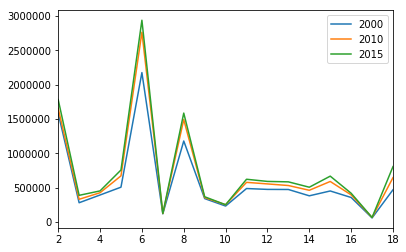

In [120]:
# quick plot
# ugly but helpful
mm_df.plot()

#### Quick Stats

In [124]:
population_df.loc[population_df["Geographic Location"]=="..National Capital Region (NCR)"]

,Geographic Location,2000,2010,2015
1,..National Capital Region (NCR),9932560,11855975,12877253


In [172]:
pd.DataFrame(mm_df.loc[:,"2000":"2015"].sum()).transpose()

,2000,2010,2015
0,9932560,11855975,12877253


#### Visualization

In [185]:
mm_df.sum()[1:]

2000     9932560
2010    11855975
2015    12877253
dtype: object

Text(0.5, 0, 'Census Year')

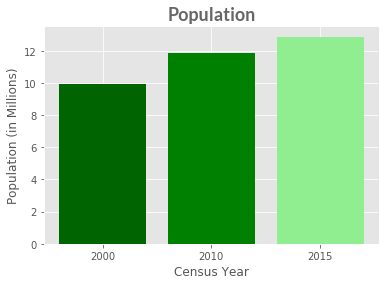

In [210]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig,ax = plt.subplots(1)

title_font = {'fontname':'Lato','fontsize':18,'fontweight':'bold',"color":"#666666"}

year_colors = ["DarkGreen","Green","LightGreen"]


ax.bar(height=mm_df.sum()[1:]/1000000,x=mm_df.columns[1:],color=year_colors)
ax.set_title("Population", **title_font)
ax.set_ylabel("Population (in Millions)")
ax.set_xlabel("Census Year")

#### What are the populations of each city in Metro Manila in 2015?

In [211]:
### What are the populations of each city in Metro Manila in 2015?
mm_df.loc[:,["Geographic Location","2015"]]

,Geographic Location,2015
2,City of Manila,1780148
3,City of Mandaluyong,386276
4,City of Marikina,450741
5,City of Pasig,755300
6,Quezon City,2936116
7,City of San Juan,122180
8,Caloocan City,1583978
9,City of Malabon,365525
10,City of Navotas,249463
11,City of Valenzuela,620422


In [216]:
mm_df.loc[:,["Geographic Location","2015"]]

,Geographic Location,2015
2,City of Manila,1780148
3,City of Mandaluyong,386276
4,City of Marikina,450741
5,City of Pasig,755300
6,Quezon City,2936116
7,City of San Juan,122180
8,Caloocan City,1583978
9,City of Malabon,365525
10,City of Navotas,249463
11,City of Valenzuela,620422


In [222]:
# convert to numeric
mm_df.loc[:,["2015"]]=mm_df.loc[:,["2015"]].apply(pd.to_numeric).copy()

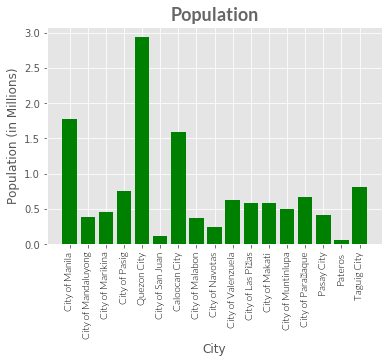

In [242]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig,ax = plt.subplots(1)

title_font = {'fontname':'Lato','fontsize':18,'fontweight':'bold',"color":"#666666"}
tick_font = {'fontname':'Lato','fontsize':10,"color":"Black"}


ax.bar(height=mm_df.loc[:,"2015"]/1000000,x=mm_df.loc[:,"Geographic Location"], color="Green")
ax.set_title("Population", **title_font)
ax.set_ylabel("Population (in Millions)")
ax.set_xlabel("City")
ax.set_xticklabels(mm_df.loc[:,"Geographic Location"],**tick_font)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

#### How about 2010?

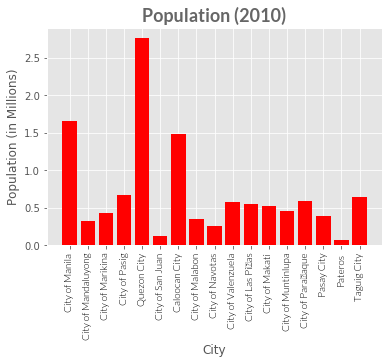

In [241]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig,ax = plt.subplots(1)

title_font = {'fontname':'Lato','fontsize':18,'fontweight':'bold',"color":"#666666"}
tick_font = {'fontname':'Lato','fontsize':10,"color":"Black"}


ax.bar(height=mm_df.loc[:,"2010"]/1000000,x=mm_df.loc[:,"Geographic Location"], color="Red")
ax.set_title("Population (2010)", **title_font)
ax.set_ylabel("Population (in Millions)")
ax.set_xlabel("City")
ax.set_xticklabels(mm_df.loc[:,"Geographic Location"],**tick_font)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [255]:
metromanila.loc[:,"NAME_2"].unique()

array(['Kalookan City', 'Las PiÃ±as', 'Makati City', 'Malabon',
       'Mandaluyong', 'Manila', 'Marikina', 'Muntinlupa', 'Navotas',
       'ParaÃ±aque', 'Pasay City', 'Pasig City', 'Pateros', 'Quezon City',
       'San Juan', 'Taguig', 'Valenzuela'], dtype=object)

In [257]:
# Small Cities
mm_df[mm_df.loc[:,"2015"]<=500000]

,Geographic Location,2000,2010,2015
3,City of Mandaluyong,278474,328699,386276
4,City of Marikina,391170,424150,450741
7,City of San Juan,117680,121430,122180
9,City of Malabon,338855,353337,365525
10,City of Navotas,230403,249131,249463
16,Pasay City,354908,392869,416522
17,Pateros,57407,64147,63840


In [258]:
small_cities_df = mm_df[mm_df.loc[:,"2015"]<=500000].copy()

In [259]:
small_cities_df

,Geographic Location,2000,2010,2015
3,City of Mandaluyong,278474,328699,386276
4,City of Marikina,391170,424150,450741
7,City of San Juan,117680,121430,122180
9,City of Malabon,338855,353337,365525
10,City of Navotas,230403,249131,249463
16,Pasay City,354908,392869,416522
17,Pateros,57407,64147,63840


In [261]:
# Map geographic names
city_mapping={'City of Mandaluyong':'Mandaluyong',
                     'City of Marikina':'Marikina',
                     'City of San Juan':'San Juan',
                     'City of Malabon':'Malabon',
                     'City of Navotas':'Navotas',
                     'Pasay City':'Pasay City',
                     'Pateros':'Pateros'

                    }

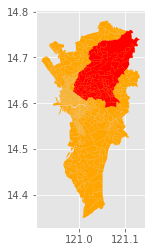

In [251]:
fig, ax = plt.subplots(1)
metromanila[metromanila["NAME_1"]=="Metropolitan Manila"].plot(ax=ax,color="Orange")
metromanila[metromanila["NAME_2"]=="Quezon City"].plot(ax=ax,color="Red")


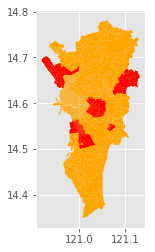

In [266]:
fig, ax = plt.subplots(1)
metromanila[metromanila["NAME_1"]=="Metropolitan Manila"].plot(ax=ax,color="Orange")
metromanila[metromanila["NAME_2"].isin([city_mapping[c] for c in small_cities_df["Geographic Location"]])].plot(ax=ax,color="Red")
            
            
            

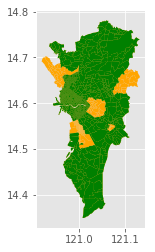

In [267]:
# Large Cities
fig, ax = plt.subplots(1)
metromanila[metromanila["NAME_1"]=="Metropolitan Manila"].plot(ax=ax,color="Orange")
metromanila[~metromanila["NAME_2"].isin([city_mapping[c] for c in small_cities_df["Geographic Location"]])].plot(ax=ax,color="Green")
   